In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re

In [22]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [23]:
def clean_poem_column(df):
    # 确保所有数据都是字符串类型
    df = df.dropna(subset=['Poem'])

    df['Poem'] = df['Poem'].astype(str)

    # remove "(<.*?>)" markup
    df['Poem'] = df['Poem'].apply(lambda x: re.sub('(<.*?>)', ' ', x))
    # remove punctuation marks 
    df['Poem'] = df['Poem'].apply(lambda x: re.sub('[,\\.!?:()"]', '', x))
    # remove whitespace
    df['Poem'] = df['Poem'].apply(lambda x: x.strip())
    # remove all strings that contain a non-letter
    df['Poem'] = df['Poem'].apply(lambda x: re.sub('[^a-zA-Z"]',' ',x))
    # convert to lower
    df['Poem'] = df['Poem'].apply(lambda x: x.lower())
    
    return df

In [24]:
train = clean_poem_column(train)    
test = clean_poem_column(test)

/var/folders/w5/22546_gj023_7nkm2d1shgcc0000gn/T/ipykernel_13372/1717507163.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Poem'] = df['Poem'].astype(str)
/var/folders/w5/22546_gj023_7nkm2d1shgcc0000gn/T/ipykernel_13372/1717507163.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Poem'] = df['Poem'].apply(lambda x: re.sub('(<.*?>)', ' ', x))
/var/folders/w5/22546_gj023_7nkm2d1shgcc0000gn/T/ipykernel_13372/1717507163.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [25]:
train.head()

,Genre,Poem
1,Music,in the thick brushthey spend the hottest part ...
2,Music,storms are generous ...
3,Music,after ana mendieta did you carry around the m...
4,Music,for aja sherrard at the portent may itself b...
5,Music,for bob marley bavaria november here is t...


In [26]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('averaged_perceptron_tagger')
lemmatizer= WordNetLemmatizer()
from nltk.corpus import wordnet

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/pineapple/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/pineapple/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [27]:
def pos_tagger(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:         
        return None

In [28]:
def tagged_lemma(string):
    
    pos_tagged = nltk.pos_tag(nltk.word_tokenize(string))

    wordnet_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tagged))

    lemmatized_sentence = []

    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatized_sentence.append(word)
        else:       
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    lemmatized_sentence = " ".join(lemmatized_sentence)
    return lemmatized_sentence

In [29]:
train['Poem']=train['Poem'].apply(tagged_lemma)
test['Poem']=test['Poem'].apply(tagged_lemma)

In [36]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [37]:
def clean_poem_text(df):
    # 确保 NLTK 的必要数据已下载
    import nltk
    nltk.download('stopwords')
    nltk.download('punkt')
    
    # 将 Poem 列中的文本转换为单词序列
    words = df['Poem'].apply(lambda x: word_tokenize(x))
    
    # 获取英文停用词
    stop_words = set(stopwords.words('english'))
    
    # 过滤掉停用词
    filtered_words = words.apply(lambda x: [w for w in x if not w in stop_words])
    
    # 将过滤后的单词列表重新连接成字符串
    df['Poem'] = filtered_words.apply(lambda x: " ".join(x))
    
    return df

In [38]:
train = clean_poem_text(train)
test = clean_poem_text(test)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pineapple/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/pineapple/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pineapple/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/pineapple/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [39]:
train.head()

,Genre,Poem
1,Music,thick brushthey spend hot part day soak hooves...
2,Music,storm generous something easy surrender sit wi...
3,Music,ana mendieta carry around matin star hold fore...
4,Music,aja sherrard portent may memory wallace steven...
5,Music,bob marley bavaria november brilliant morning ...


In [41]:
def map_first_column_to_labels(df):
    # 获取第一列的不同元素
    unique_elements = df.iloc[:, 0].unique()
    
    # 创建一个映射字典，将每个唯一元素映射到一个标签
    label_mapping = {element: idx for idx, element in enumerate(unique_elements)}
    
    # 将第一列的元素替换为相应的标签
    df.iloc[:, 0] = df.iloc[:, 0].map(label_mapping)
    
    return df, label_mapping

In [42]:
train, label_mapping = map_first_column_to_labels(train)

In [45]:
test,_ = map_first_column_to_labels(test)

In [50]:
train.head()


,Genre,Poem
1,0,thick brushthey spend hot part day soak hooves...
2,0,storm generous something easy surrender sit wi...
3,0,ana mendieta carry around matin star hold fore...
4,0,aja sherrard portent may memory wallace steven...
5,0,bob marley bavaria november brilliant morning ...


Validation Accuracy: 0.42857142857142855
Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.53      0.45        47
           1       0.34      0.33      0.34        45
           2       0.14      0.05      0.07        22
           3       0.60      0.57      0.58        54

    accuracy                           0.43       168
   macro avg       0.37      0.37      0.36       168
weighted avg       0.41      0.43      0.41       168



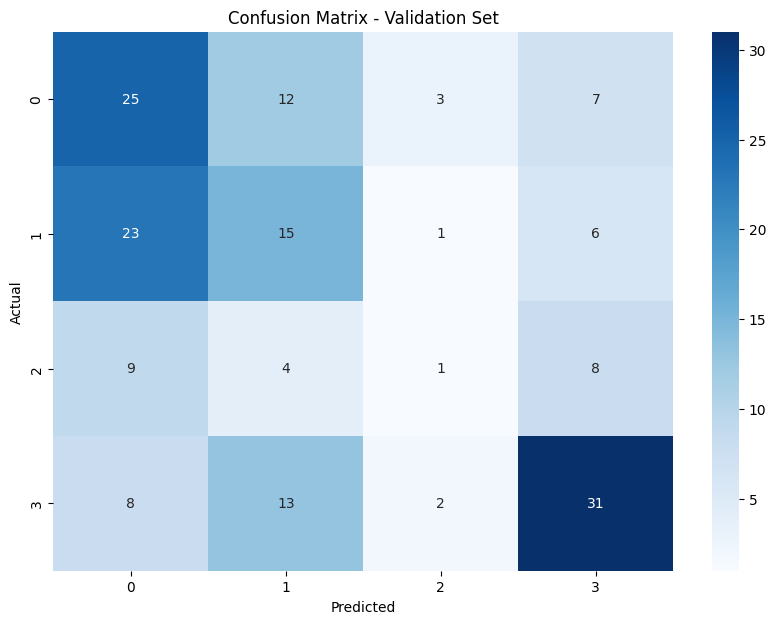

Test Accuracy: 0.24666666666666667
Test Classification Report:
               precision    recall  f1-score   support

           0       0.10      0.42      0.17        12
           1       0.07      0.23      0.10        13
           2       0.90      0.18      0.30       100
           3       0.31      0.44      0.36        25

    accuracy                           0.25       150
   macro avg       0.34      0.32      0.23       150
weighted avg       0.66      0.25      0.28       150



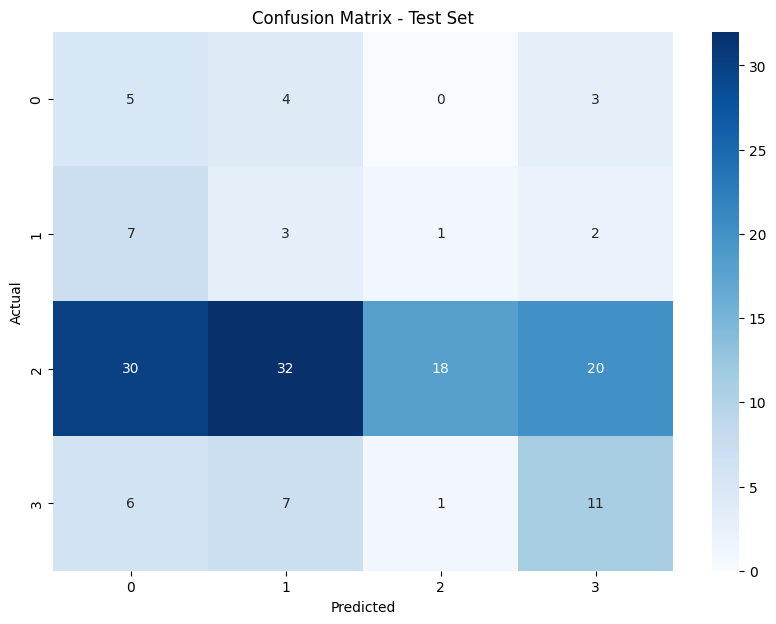

In [56]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def ensure_discrete_labels(y):
    # 确保标签是离散的分类标签
    if y.dtype != 'int':
        y = y.astype('int')
    return y

# 确保标签是离散的分类标签
train['Genre'] = ensure_discrete_labels(train['Genre'])
test['Genre'] = ensure_discrete_labels(test['Genre'])

# 特征提取
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(train['Poem'])
y = train['Genre']

# 划分训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 选择和训练模型
model = LogisticRegression()
model.fit(X_train, y_train)

# 在验证集上评估模型
y_pred = model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))

# 生成验证集的混淆矩阵
conf_matrix_val = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_val, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Validation Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 在测试集上进行预测
X_test = vectorizer.transform(test['Poem'])
test_predictions = model.predict(X_test)

# 假设 test 的第一列是标签
y_test = test['Genre']

print("Test Accuracy:", accuracy_score(y_test, test_predictions))
print("Test Classification Report:\n", classification_report(y_test, test_predictions))

# 生成测试集的混淆矩阵
conf_matrix_test = confusion_matrix(y_test, test_predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [57]:
from sklearn.svm import SVC


Validation Accuracy: 0.47619047619047616
Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.60      0.50        47
           1       0.44      0.40      0.42        45
           2       0.33      0.18      0.24        22
           3       0.60      0.56      0.58        54

    accuracy                           0.48       168
   macro avg       0.45      0.43      0.43       168
weighted avg       0.47      0.48      0.47       168



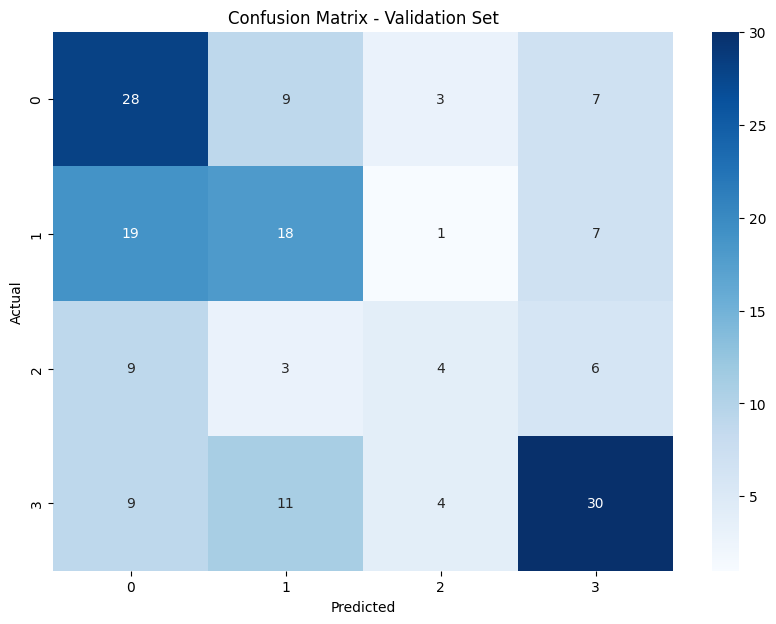

Test Accuracy: 0.28
Test Classification Report:
               precision    recall  f1-score   support

           0       0.11      0.42      0.17        12
           1       0.07      0.23      0.10        13
           2       0.92      0.22      0.35       100
           3       0.34      0.48      0.40        25

    accuracy                           0.28       150
   macro avg       0.36      0.34      0.26       150
weighted avg       0.68      0.28      0.33       150



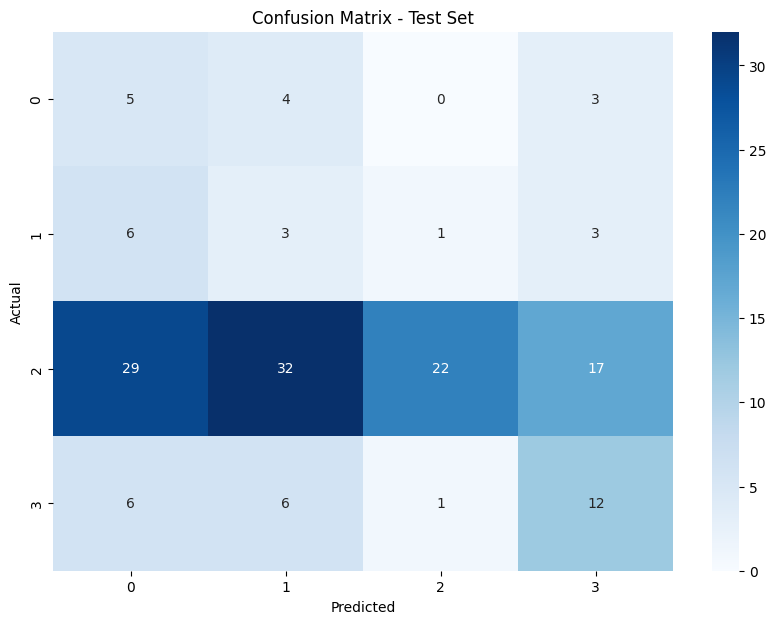

In [58]:
model = SVC(kernel='linear')  # 使用线性核函数的SVM
model.fit(X_train, y_train)

# 在验证集上评估模型
y_pred = model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))

# 生成验证集的混淆矩阵
conf_matrix_val = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_val, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Validation Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 在测试集上进行预测
X_test = vectorizer.transform(test['Poem'])
test_predictions = model.predict(X_test)

# 假设 test 的第一列是标签
y_test = test['Genre']

print("Test Accuracy:", accuracy_score(y_test, test_predictions))
print("Test Classification Report:\n", classification_report(y_test, test_predictions))

# 生成测试集的混淆矩阵
conf_matrix_test = confusion_matrix(y_test, test_predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Epoch [1/100], Loss 1.3678
Epoch [2/100], Loss 1.3550
Epoch [3/100], Loss 1.2967
Epoch [4/100], Loss 1.3034
Epoch [5/100], Loss 1.3596
Epoch [6/100], Loss 1.3423
Epoch [7/100], Loss 1.0357
Epoch [8/100], Loss 1.4102
Epoch [9/100], Loss 0.8394
Epoch [10/100], Loss 0.9994
Epoch [11/100], Loss 0.6696
Epoch [12/100], Loss 1.0360
Epoch [13/100], Loss 1.0037
Epoch [14/100], Loss 1.1721
Epoch [15/100], Loss 1.2455
Epoch [16/100], Loss 1.0931
Epoch [17/100], Loss 1.4138
Epoch [18/100], Loss 1.1193
Epoch [19/100], Loss 1.2184
Epoch [20/100], Loss 1.5136
Epoch [21/100], Loss 1.3337
Epoch [22/100], Loss 0.9716
Epoch [23/100], Loss 1.6277
Epoch [24/100], Loss 1.3283
Epoch [25/100], Loss 1.1120
Epoch [26/100], Loss 1.6259
Epoch [27/100], Loss 0.8530
Epoch [28/100], Loss 0.9317
Epoch [29/100], Loss 1.2109
Epoch [30/100], Loss 1.6366
Epoch [31/100], Loss 1.1557
Epoch [32/100], Loss 1.2638
Epoch [33/100], Loss 1.0742
Epoch [34/100], Loss 1.1648
Epoch [35/100], Loss 1.3415
Epoch [36/100], Loss 1.3044
E

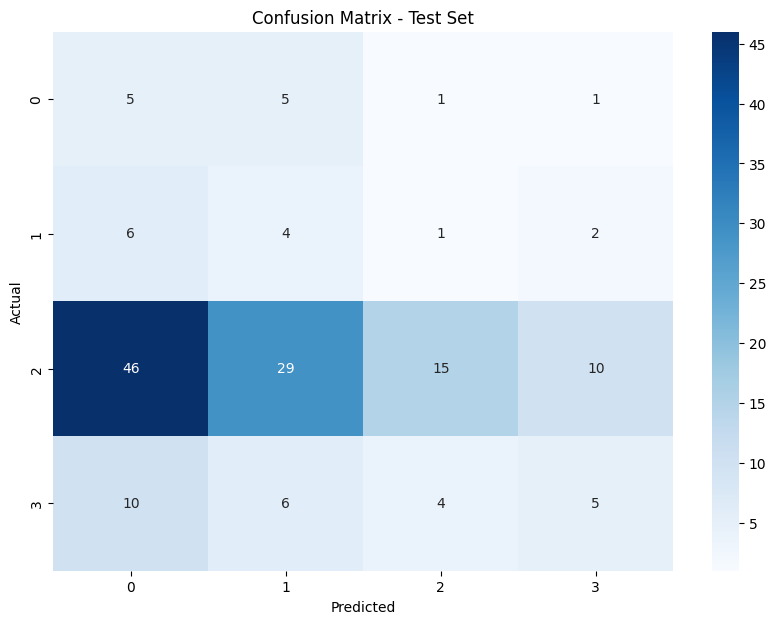

In [62]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import LatentDirichletAllocation
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.preprocessing import StandardScaler

class TextDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        return self.texts[idx], self.labels[idx]

class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers):
        super(LSTMModel, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).to(device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).to(device)
        out, _ = self.lstm(x.unsqueeze(1), (h0, c0))  # 添加 unsqueeze(1) 以匹配 LSTM 的输入维度
        out = self.fc(out[:, -1, :])
        return out

def ensure_discrete_labels(y):
    if y.dtype != 'int':
        y = y.astype('int')
    return y

# 确保标签是离散的分类标签
train['Genre'] = ensure_discrete_labels(train['Genre'])
test['Genre'] = ensure_discrete_labels(test['Genre'])

# 标签编码
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train['Genre'])
y_test = label_encoder.transform(test['Genre'])

# 特征提取
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train['Poem']).toarray()
X_test = vectorizer.transform(test['Poem']).toarray()

# LDA 降维
n_components = 100  # LDA 组件数
lda = LatentDirichletAllocation(n_components=n_components, random_state=42)
X_train_lda = lda.fit_transform(X_train)
X_test_lda = lda.transform(X_test)

# 数据标准化
scaler = StandardScaler()
X_train_lda = scaler.fit_transform(X_train_lda)
X_test_lda = scaler.transform(X_test_lda)

# 转换为 PyTorch 张量
X_train_lda = torch.tensor(X_train_lda, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
X_test_lda = torch.tensor(X_test_lda, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

# 创建数据加载器
train_dataset = TextDataset(X_train_lda, y_train)
test_dataset = TextDataset(X_test_lda, y_test)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# 模型参数
input_dim = X_train_lda.shape[1]
hidden_dim = 128
output_dim = len(label_encoder.classes_)
num_layers = 2
num_epochs = 100
learning_rate = 0.001

# 初始化模型、损失函数和优化器
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = LSTMModel(input_dim, hidden_dim, output_dim, num_layers).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# 训练模型
model.train()
for epoch in range(num_epochs):
    for texts, labels in train_loader:
        texts, labels = texts.to(device), labels.to(device)
        outputs = model(texts)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss {loss.item():.4f}')

# 在验证集上评估模型
model.eval()
with torch.no_grad():
    y_pred = []
    y_true = []
    for texts, labels in test_loader:
        texts, labels = texts.to(device), labels.to(device)
        outputs = model(texts)
        _, predicted = torch.max(outputs.data, 1)
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

print("Test Accuracy:", accuracy_score(y_true, y_pred))
print("Test Classification Report:\n", classification_report(y_true, y_pred))

# 生成测试集的混淆矩阵
conf_matrix_test = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()